<a href="https://colab.research.google.com/github/kunakl07/orcagsoc/blob/master/preprocessa_and_Spec_Save_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get -qq install awscli
!aws --no-sign-request s3 cp s3://acoustic-sandbox/labeled-data/detection/train/OrcasoundLab07052019_PodCastRound2.tar.gz ./ 
!aws --no-sign-request s3 cp s3://acoustic-sandbox/labeled-data/detection/train/OrcasoundLab09272017_PodCastRound3.tar.gz ./
!aws --no-sign-request s3 cp s3://acoustic-sandbox/labeled-data/detection/test/OrcasoundLab09272017_Test.tar.gz ./
!tar -xzf OrcasoundLab09272017_PodCastRound3.tar.gz
!tar -xzf OrcasoundLab07052019_PodCastRound2.tar.gz
!tar -xzf OrcasoundLab09272017_Test.tar.gz
!pip -q install ketos==2.0.0b4
!pip -q install pysoundfile

Selecting previously unselected package sgml-base.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack .../00-sgml-base_1.29_all.deb ...
Unpacking sgml-base (1.29) ...
Selecting previously unselected package python3-yaml.
Preparing to unpack .../01-python3-yaml_3.12-1build2_amd64.deb ...
Unpacking python3-yaml (3.12-1build2) ...
Selecting previously unselected package python3-six.
Preparing to unpack .../02-python3-six_1.11.0-2_all.deb ...
Unpacking python3-six (1.11.0-2) ...
Selecting previously unselected package python3-dateutil.
Preparing to unpack .../03-python3-dateutil_2.6.1-1_all.deb ...
Unpacking python3-dateutil (2.6.1-1) ...
Selecting previously unselected package xml-core.
Preparing to unpack .../04-xml-core_0.18_all.deb ...
Unpacking xml-core (0.18) ...
Selecting previously unselected package docutils-common.
Preparing to unpack .../05-docutils-common_0.14+dfsg-3_all.deb ...
Unpacking docutils-common (0.14+dfsg-3) ...
Selecting prev

In [0]:
import pandas as pd
from ketos.data_handling import selection_table as sl
import ketos.data_handling.database_interface as dbi
from ketos.data_handling.parsing import load_audio_representation
from ketos.audio.spectrogram import MagSpectrogram
from ketos.data_handling.parsing import load_audio_representation

/usr/local/lib/python3.6/dist-packages/numba/errors.py:137: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [0]:
annot_train2 = pd.read_csv('/content/podcast2.tsv', sep='\t')
#df2 = annot_train2
annot_train3 = pd.read_csv('/content/podcast3.tsv', sep='\t')
#df3 = annot_train3


In [0]:
annot_test = pd.read_csv('/content/v10_test.tsv', sep='\t')
#dftest = annot_test
# where'd this come from?
#I uploaded this from the local files
#annot_val=pd.read_csv('/content/val_pod3.tsv', sep='\t')
#dfval=annot_val

In [0]:
annot_train2["duration_s"].mean()

2.1110548004254963

In [0]:
annot_train3["duration_s"].mean()

1.9741213114468479

In [0]:
(2.1110548004254963+1.9741213114468479)/2

2.042588055936172

In [0]:
annot_train2.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label
0,1562337136_0004.wav,49.765625,2.450000,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs
1,1562337136_0004.wav,41.046007,1.658854,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs
2,1562337136_0004.wav,37.345486,1.743924,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs
3,1562337136_0004.wav,42.917535,2.594618,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs
4,1562337136_0004.wav,45.980035,2.041667,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs


In [0]:

annot_train3.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label
0,OS_9_27_2017_08_14_00__0002.wav,6.110451,1.745843,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
1,OS_9_27_2017_08_14_00__0004.wav,12.717882,2.450000,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
2,OS_9_27_2017_08_14_00__0004.wav,29.825347,1.811979,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
3,OS_9_27_2017_08_14_00__0004.wav,43.504514,1.599306,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
4,OS_9_27_2017_08_14_00__0004.wav,48.404514,1.939583,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs


In [0]:
annot_test.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label
0,OS_9_27_2017_08_14_00__0001.wav,11.643564,2.450000,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
1,OS_9_27_2017_08_14_00__0001.wav,15.594059,2.165842,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
2,OS_9_27_2017_08_14_00__0001.wav,53.900000,2.450000,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
3,OS_9_27_2017_08_14_00__0001.wav,59.781486,1.468514,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
4,OS_9_27_2017_08_19_00__0002.wav,6.592882,1.233507,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_19,SRKWs


In [0]:
annot_train2["end"] = annot_train2["start"] + annot_train2["duration_s"]
annot_train2.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label,end
0,1562337136_0004.wav,49.765625,2.450000,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,52.215625
1,1562337136_0004.wav,41.046007,1.658854,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,42.704861
2,1562337136_0004.wav,37.345486,1.743924,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,39.089410
3,1562337136_0004.wav,42.917535,2.594618,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,45.512153
4,1562337136_0004.wav,45.980035,2.041667,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,48.021701


In [0]:
annot_train3["end"] = annot_train3["start"] + annot_train3["duration_s"]
annot_train3.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label,end
0,OS_9_27_2017_08_14_00__0002.wav,6.110451,1.745843,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,7.856295
1,OS_9_27_2017_08_14_00__0004.wav,12.717882,2.450000,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,15.167882
2,OS_9_27_2017_08_14_00__0004.wav,29.825347,1.811979,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,31.637326
3,OS_9_27_2017_08_14_00__0004.wav,43.504514,1.599306,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,45.103819
4,OS_9_27_2017_08_14_00__0004.wav,48.404514,1.939583,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,50.344097


In [0]:
annot_test["end"] = annot_test["start"] + annot_test["duration_s"]
annot_test.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label,end
0,OS_9_27_2017_08_14_00__0001.wav,11.643564,2.450000,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,14.093564
1,OS_9_27_2017_08_14_00__0001.wav,15.594059,2.165842,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,17.759901
2,OS_9_27_2017_08_14_00__0001.wav,53.900000,2.450000,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,56.350000
3,OS_9_27_2017_08_14_00__0001.wav,59.781486,1.468514,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,61.250000
4,OS_9_27_2017_08_19_00__0002.wav,6.592882,1.233507,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_19,SRKWs,7.826389


In [0]:
map_to_ketos_annot_std = {'wav_filename': 'filename'} 



In [0]:
map_to_ketos_annot_std ={'wav_filename': 'filename'} 
std_annot_train2 = sl.standardize(table=annot_train2, signal_labels=["SRKWs"], mapper=map_to_ketos_annot_std, trim_table=True)
std_annot_train3 = sl.standardize(table=annot_train3, signal_labels=["SRKWs"], mapper=map_to_ketos_annot_std, trim_table=True)
#std_annot_val = sl.standardize(table=annot_val, signal_labels=["SRKWs"], mapper=map_to_ketos_annot_std, trim_table=True)

std_annot_test = sl.standardize(table=annot_test, signal_labels=["SRKWs"], mapper=map_to_ketos_annot_std, trim_table=True)
#annot_std, label_dict = sl.standardize(annot_train, mapper={'wav_filename':'filename', 'start_time':'start_time_s', 'end':'end','label':'label'}, return_label_dict=True)


In [0]:
std_annot_train2.head()


start  label        end
filename            annot_id                             
1562337136_0004.wav 0         49.765625      1  52.215625
                    1         41.046007      1  42.704861
                    2         37.345486      1  39.089410
                    3         42.917535      1  45.512153
                    4         45.980035      1  48.021701

In [0]:
std_annot_train3.head()

start  label        end
filename                        annot_id                             
OS_9_27_2017_08_14_00__0002.wav 0          6.110451      1   7.856295
OS_9_27_2017_08_14_00__0004.wav 0         12.717882      1  15.167882
                                1         29.825347      1  31.637326
                                2         43.504514      1  45.103819
                                3         48.404514      1  50.344097

In [0]:
std_annot_test.head()

start  label        end
filename                        annot_id                             
OS_9_27_2017_08_14_00__0001.wav 0         11.643564      1  14.093564
                                1         15.594059      1  17.759901
                                2         53.900000      1  56.350000
                                3         59.781486      1  61.250000
OS_9_27_2017_08_19_00__0002.wav 0          6.592882      1   7.826389

In [0]:
std_annot_train2.to_csv('standardized_train2.tsv', mode='a', sep='\t',header=False)
std_annot_train3.to_csv('standardized_train3.tsv', mode='a', sep='\t',header=False)
std_annot_test.to_csv('standardized_test.tsv', mode='a', sep='\t',header=False)

In [0]:
%cd /content/

/content


In [0]:
#std_annot_val.to_csv('standardized_val.tsv', mode='a', sep='\t',header=False)

In [0]:
annot_id2 = pd.read_csv('/content/standardized_train2.tsv', sep='\t')


In [0]:
annot_id3 = pd.read_csv('/content/standardized_train3.tsv', sep='\t')
annot_idtest = pd.read_csv('/content/standardized_test.tsv', sep='\t')
#annot_val=pd.read_csv('/content/standardized_val.tsv', sep='\t')

In [0]:
std_annot_train2

start  label        end
filename            annot_id                             
1562337136_0004.wav 0         49.765625      1  52.215625
                    1         41.046007      1  42.704861
                    2         37.345486      1  39.089410
                    3         42.917535      1  45.512153
                    4         45.980035      1  48.021701
...                                 ...    ...        ...
1562344334_000e.wav 4         29.699870      1  31.805339
                    5         43.895833      1  46.384115
                    6         54.295573      1  56.273438
1562344334_000f.wav 0          7.440918      1   9.546387
1562344334_001c.wav 0         31.534653      1  33.700495

[357 rows x 3 columns]

In [0]:

file_name_pos_train2=annot_train2.iloc[:,0].values
start_time_pos_train2=annot_train2.iloc[:,1].values
#=annot_id2.iloc[:,0].values
#print(a)
print((file_name_pos_train2[0]))
print(start_time_pos_train2[0])


1562337136_0004.wav
49.765625


In [0]:
annot_train2.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label,end
0,1562337136_0004.wav,49.765625,2.450000,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,52.215625
1,1562337136_0004.wav,41.046007,1.658854,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,42.704861
2,1562337136_0004.wav,37.345486,1.743924,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,39.089410
3,1562337136_0004.wav,42.917535,2.594618,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,45.512153
4,1562337136_0004.wav,45.980035,2.041667,orcasound_lab,2019-07-05,Orcasound_PodCast_Round2,1562337136,SRKWs,48.021701


In [0]:

file_name_pos_train3=annot_train3.iloc[:,0].values
start_time_pos_train3=annot_train3.iloc[:,1].values
#=annot_id2.iloc[:,0].values
#print(a)
print((file_name_pos_train3[0]))
print(start_time_pos_train3[0])


OS_9_27_2017_08_14_00__0002.wav
6.1104513064133


In [0]:
annot_train3.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label,end
0,OS_9_27_2017_08_14_00__0002.wav,6.110451,1.745843,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,7.856295
1,OS_9_27_2017_08_14_00__0004.wav,12.717882,2.450000,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,15.167882
2,OS_9_27_2017_08_14_00__0004.wav,29.825347,1.811979,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,31.637326
3,OS_9_27_2017_08_14_00__0004.wav,43.504514,1.599306,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,45.103819
4,OS_9_27_2017_08_14_00__0004.wav,48.404514,1.939583,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,50.344097


In [0]:
!pip install pydub

In [0]:
!pwd

/content


In [0]:
%cd /content/Round2_OS_07_05/wav

/content/Round2_OS_07_05/wav


In [0]:
file_name_pos_train2[:10]


array(['1562337136_0004.wav', '1562337136_0004.wav',
       '1562337136_0004.wav', '1562337136_0004.wav',
       '1562337136_0004.wav', '1562337136_0004.wav',
       '1562337136_0004.wav', '1562337136_0006.wav',
       '1562337136_0006.wav', '1562337136_0006.wav'], dtype=object)

In [0]:
!mkdir pod_calls

In [0]:
!pwd

/content/Round2_OS_07_05/wav


In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name_pos_train2:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time_pos_train2[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+2000
  call=sound[p:o]
  #i=i+1
  call.export("/content/Round2_OS_07_05/wav/pod_calls/MMMcalls{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

49765.625
41046.0069444444
37345.4861111111
42917.534722222204
45980.034722222204
52700.5208333333
55295.1388888889
1147.64052741152
26115.197779319897
29995.0728660652
34725.0520471894
52485.426786953496
36554.4760582929
13883.906030855502
17708.3800841515
21964.095371669
19672.159887798
27846.966527196604
29329.9511854951
34229.951185495105
56773.709902370996
37544.4560669456
46172.41980474201
6233.23983169705
42204.9438990182
56264.09537166899
58972.44491458839
13916.549789621302
7261.1576011157595
8286.26220362622
10550.0348675035
11318.8633193863
34554.5676429568
52237.62203626221
53647.1408647141
14451.171875
47755.859375
56895.5078125
31508.298465829805
37607.6708507671
1250.0
58064.3398354815
13398.4375
27945.3125
17035.15625
38233.3984375
46798.828125
57363.1450488145
11881.54296875
20336.9140625
34300.0
41412.04351204351
46430.0699300699
51488.28125
53785.15625
57134.765625
129.12860154603
5552.52986647927
8522.487702037952
21091.0049191848
24534.434293745606
30216.0927617709

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'

In [0]:
%cd /content/Round3_OS_09_27_2017/wav 

/content/Round3_OS_09_27_2017/wav


In [0]:
%cd /content/

/content


In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name_pos_train3:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time_pos_train3[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+2000
  call=sound[p:o]
  #i=i+1
  call.export("/content/Round2_OS_07_05/wav/pod_calls/calls_pod33{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

6110.451306413301
12717.881944444402
29825.347222222197
43504.5138888889
48404.5138888889
3530.3819444444403
18842.8819444444
21692.7083333333
38281.25
45980.034722222204
54104.1666666667
9311.163895486938
19058.7885985748
22259.501187648504
32977.0387965162
30880.2083333333
11994.791666666699
36111.9791666667
37898.4375
45894.965277777796
49042.534722222204
11532.2265625
16365.234375
20145.5078125
39094.7265625
5790.0390625
8326.171875
2631.8359375
24500.0
38519.444444444394
53729.8611111111
56605.208333333394
5869.79166666667
2807.2916666666697
0.0
33087.6088677751
36750.0
50115.3998416469
23132.4228028504
25557.2050673001
29776.326207442606
40833.3333333333
45440.41963578779
47671.2193190816
0.0
19600.0
26093.3566433566
30351.8259518259
37368.6868686869
44195.1825951826
6139.27738927739
12135.7808857809
47591.297591297596
50351.592851592904
53545.8984375
57134.765625
59240.234375
17728.740157480304
20564.5669291339
24500.0
26950.0
50061.0236220473
56784.05511811029
59468.52494475739

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'

20000


In [0]:

import numpy as np
from os import listdir
from os.path import isfile, join
from scipy import signal
import soundfile as sf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [0]:
!pwd

/content/Round3_OS_09_27_2017/wav


In [0]:
%cd /content/Round2_OS_07_05

/content/Round2_OS_07_05


In [0]:
!mkdir train

In [0]:
!mkdir test

In [0]:
%cd train

/content/Round2_OS_07_05/train


In [0]:
!mkdir calls

In [0]:
!mkdir nocalls

In [0]:
%cd /content/Round2_OS_07_05/test

/content/Round2_OS_07_05/test


In [0]:

siz = wavread(filename,'size') %siz = [samples channels]
siz(1)/Fs %should give you the length in seconds

In [0]:
!pwd

/content/Round2_OS_07_05/test


In [0]:
!mkdir calls

In [0]:
!mkdir nocalls

In [0]:
basePath = r"/content/Round2_OS_07_05/"
plotPath = join(basePath,"train/calls")
folderpath = join(basePath, "wav/pod_calls")
onlyfiles = [f for f in listdir(folderpath) if isfile(join(join(folderpath, f)))]

for idx, file in enumerate(onlyfiles):
    data, samplerate = sf.read(join(folderpath, file))
    f, t, spec = signal.spectrogram(data, samplerate)
    filename = file.split(sep=".")[0]
    #filenumber = filename.split(sep="-")[1]
    
    fig, ax = plt.subplots(1, 1)
    ax.specgram(data, Fs=samplerate, NFFT=1024)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Rescale y axis labels from Hz to KHz
    scale_y = 1000
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    #ax.yaxis.set_major_formatter(ticks_y)
    
    #ax.set_xlabel("Time (s)")
    #ax.set_ylabel("Frequency (kHz)")
    #ax.set_title("Call " + filenumber)
    #print(plt.shape)    
    plt.savefig(join(plotPath, 
                 filename + ".png"))
    plt.close(fig)

In [0]:
positives_train2 = sl.select(annotations=std_annot_train2, length=3.0)
positives_train2.head()


label      start        end
filename            sel_id                             
1562337136_0004.wav 0           1  49.348303  52.348303
                    1           1  40.151478  43.151478
                    2           1  37.024979  40.024979
                    3           1  42.711614  45.711614
                    4           1  45.671350  48.671350
...                           ...        ...        ...
1562344334_000e.wav 4           1  28.927266  31.927266
                    5           1  43.587259  46.587259
                    6           1  53.685359  56.685359
1562344334_000f.wav 0           1   6.618827   9.618827
1562344334_001c.wav 0           1  31.367467  34.367467

[357 rows x 3 columns]

In [0]:
positives_train3 = sl.select(annotations=std_annot_train2, length=3.0)
positives_train3.head()


In [0]:
file_durations_train2 = sl.file_duration_table('/content/Round2_OS_07_05/wav')


In [0]:
negatives_train2=sl.create_rndm_backgr_selections(annotations=std_annot_train2, files=file_durations_train2, length=3.0, num=len(positives_train2), trim_table=True)
negatives_train2

start        end  label
filename            sel_id                             
1562337136_0004.wav 0        1.771052   4.771052      0
                    1        4.862640   7.862640      0
                    2        5.159236   8.159236      0
                    3       11.424016  14.424016      0
                    4       31.195520  34.195520      0
...                               ...        ...    ...
1562344334_001c.wav 6       24.727145  27.727145      0
                    7       38.977886  41.977886      0
                    8       43.867668  46.867668      0
                    9       54.789967  57.789967      0
                    10      57.178264  60.178264      0

[357 rows x 3 columns]

In [0]:
positives_train33 = sl.select(annotations=std_annot_train3, length=3.0)
#positives_train2
file_durations_train33 = sl.file_duration_table('/content/Round3_OS_09_27_2017/wav')
negatives_train33=sl.create_rndm_backgr_selections(annotations=std_annot_train3, files=file_durations_train33, length=3.0, num=len(positives_train33), trim_table=True)
#negatives_train3
#selections_train3 = positives_train3.append(negatives_train3, sort=False)
negatives_train33.head()


start        end  label
filename                        sel_id                             
OS_9_27_2017_08_03_00__0002.wav 0       29.165549  32.165549      0
                                1       30.707628  33.707628      0
                                2       41.465714  44.465714      0
OS_9_27_2017_08_03_00__0003.wav 0        1.714545   4.714545      0
                                1        1.905591   4.905591      0

In [0]:
negatives_train2[0:10]

start        end  label
filename            sel_id                             
1562337136_0004.wav 0       11.447116  14.447116      0
                    1       11.449120  14.449120      0
                    2       13.702291  16.702291      0
                    3       15.562991  18.562991      0
                    4       17.810779  20.810779      0
                    5       56.713511  59.713511      0
1562337136_0005.wav 0       10.635364  13.635364      0
                    1       10.841556  13.841556      0
                    2       29.799269  32.799269      0
                    3       29.956291  32.956291      0

In [0]:
!pwd

/content/Round2_OS_07_05/test


In [0]:
negatives_train2.to_csv('negative2.tsv', mode='a', sep='\t',header=False)
negatives_train33.to_csv('negative3.tsv', mode='a', sep='\t',header=False)

In [0]:
negatives_train2save=pd.read_csv('/content/OrcasoundLab09272017_Test/negative2.tsv',sep='\t')
negatives_train33save=pd.read_csv('/content/OrcasoundLab09272017_Test/negative3.tsv',sep='\t')

In [0]:

file_name_neg_train2save=negatives_train2save.iloc[:,0].values
start_time_neg_train2save=negatives_train2save.iloc[:,2].values
#=annot_id2.iloc[:,0].values
#print(a)
print((file_name_neg_train2save[:5]))
print(start_time_neg_train2save[:5])


['1562337136_0004.wav' '1562337136_0004.wav' '1562337136_0004.wav'
 '1562337136_0004.wav' '1562337136_0004.wav']
[11.44911972 13.70229114 15.56299102 17.81077893 56.71351099]


In [0]:

file_name_neg_train3save= negatives_train33save.iloc[:,0].values
start_time_neg_train3=negatives_train33save.iloc[:,2].values
#=annot_id2.iloc[:,0].values
#print(a)
print((file_name_neg_train3save[0]))
print(start_time_neg_train3[0])


OS_9_27_2017_08_03_00__0002.wav
30.70762789844921


In [0]:
%cd /content/Round2_OS_07_05/wav

/content/Round2_OS_07_05/wav


In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name_neg_train2save:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time_neg_train2save[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+3000
  call=sound[p:o]
  #i=i+1
  call.export("/content/Round2_OS_07_05/wav/pod_calls_neg/neg_calls_pod3{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

11449.119717962187
13702.291142121061
15562.991023084724
17810.77893258983
56713.51098987451
10635.363834336258
10841.555684430547
29799.269493433985
29956.29108931223
33691.355761848805
34048.15246449054
41393.291476763734
46430.77019856464
53069.242546081776
13226.543160429886
21259.62512204427
39205.375621716965
596.1321965223759
2588.448714108523
4541.521524932903
25332.513327236484
43681.73286820375
46532.30583190231
54207.11707519234
54303.471394145876
55034.48619246026
56159.08471031372
8154.982311083444
17665.70244136127
21923.680226755296
48145.08534759875
53565.568840614615
8197.980029478571
22650.943598812602
24033.395788970553
26667.335214151422
34404.395703608534
35131.248392085414
44345.41889595419
52130.31987921585
4462.0549695060845
8214.153946378645
10988.441487979117
26620.80637658101
45094.63246297696
49393.14987503553
54368.23337500436
55244.653403605356
57249.32981770621
2128.150597534216
12881.280096267345
17495.17392799845
19763.131578661672
31121.30396315274
420

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'

In [0]:
%cd /content/Round3_OS_09_27_2017/wav

/content/Round3_OS_09_27_2017/wav


In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name_neg_train3save:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time_neg_train3[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+3000
  call=sound[p:o]
  #i=i+1
  call.export("/content/Round2_OS_07_05/wav/pod_calls_neg/neg_calls_pod3{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

30707.62789844921
41465.71355842465
1714.5452950969968
1905.59081925138
2376.4196301700977
9347.173249572863
10141.912930935265
21968.580177678305
49194.68589160951
54234.106150762425
3970.297098217316
31668.88506663156
37558.12305407312
39416.29495216796
43051.753627961145
52461.75466190782
2609.2954252660547
16106.6727945026
20660.606285925667
31111.69608746673
39621.43945912797
55542.40446147256
3579.0527455050096
11721.43352609777
12898.683284112793
28167.24003022239
34392.25156964143
35865.74376610821
56642.79757177746
17011.722831296538
19733.035628738606
26140.74096326539
28084.415611625052
38232.184537488254
10032.810595534556
14047.018501015715
33635.57007808754
41714.551450380444
2647.630633696565
29737.924002164676
34528.3407529634
40750.36590095556
49068.57377895182
51612.08635737307
51690.8900294693
57252.866248200575
33574.25611233897
27449.90585892492
28694.699398299923
40582.68729819202
53499.89860581753
56103.41678065231
57110.74734102239
2454.6893798618607
3700.122984

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'

In [0]:
basePath = r"/content/Round2_OS_07_05/"
plotPath = join(basePath,"train/nocalls")
folderpath = join(basePath, "wav/pod_calls_neg")
onlyfiles = [f for f in listdir(folderpath) if isfile(join(join(folderpath, f)))]

for idx, file in enumerate(onlyfiles):
    data, samplerate = sf.read(join(folderpath, file))
    f, t, spec = signal.spectrogram(data, samplerate)
    filename = file.split(sep=".")[0]
    #filenumber = filename.split(sep="-")[1]
    
    fig, ax = plt.subplots(1, 1)
    ax.specgram(data, Fs=samplerate, NFFT=1024)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Rescale y axis labels from Hz to KHz
    scale_y = 1000
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    #ax.yaxis.set_major_formatter(ticks_y)
    
    #ax.set_xlabel("Time (s)")
    #ax.set_ylabel("Frequency (kHz)")
    #ax.set_title("Call " + filenumber)
    #print(plt.shape)    
    plt.savefig(join(plotPath, 
                 filename + ".png"))
    plt.close(fig)

In [0]:
annot_test.head()

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label,end
0,OS_9_27_2017_08_14_00__0001.wav,11.643564,2.450000,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,14.093564
1,OS_9_27_2017_08_14_00__0001.wav,15.594059,2.165842,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,17.759901
2,OS_9_27_2017_08_14_00__0001.wav,53.900000,2.450000,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,56.350000
3,OS_9_27_2017_08_14_00__0001.wav,59.781486,1.468514,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs,61.250000
4,OS_9_27_2017_08_19_00__0002.wav,6.592882,1.233507,orcasound_lab,9/27/2017,Orcasound_PodCast_Round3,OS_9_27_2017_08_19,SRKWs,7.826389


In [0]:

file_name_pos_test=annot_test.iloc[:,0].values
start_time_pos_test=annot_test.iloc[:,1].values
#=annot_id2.iloc[:,0].values
#print(a)
print((file_name_pos_test[:5]))
print(start_time_pos_test[:5])


['OS_9_27_2017_08_14_00__0001.wav' 'OS_9_27_2017_08_14_00__0001.wav'
 'OS_9_27_2017_08_14_00__0001.wav' 'OS_9_27_2017_08_14_00__0001.wav'
 'OS_9_27_2017_08_19_00__0002.wav']
[11.64356436 15.59405941 53.9        59.7814864   6.59288194]


In [0]:
!pwd

/content/Round3_OS_09_27_2017/wav


In [0]:
%cd /content/OrcasoundLab09272017_Test

/content/OrcasoundLab09272017_Test


In [0]:
%mkdir test_positive_calls

In [0]:
%mkdir test_neg_call

In [0]:
%cd wav

/content/OrcasoundLab09272017_Test/wav


In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name_pos_test:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time_pos_test[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+3000
  call=sound[p:o]
  #i=i+1
  call.export("/content/OrcasoundLab09272017_Test/test_positive_calls/calls_pod3{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

11643.564359999998
15594.05941
53900.0
59781.486399999994
6592.881944
23011.28472
29519.09722
50769.44444
20709.25197
22725.19685
41650.0
43280.118109999996
52125.19685
54671.65354
56687.59843
60295.078740000004
0.0
2666.724257
4688.355218
7815.618521
16091.77609
18457.118179999998
20991.77609
23187.802349999998
28045.473390000003
30011.23013
31704.38839
47311.921220000004
51957.94748
60069.86869
4432.118056
7945.486111
10506.07639
12760.41667
16299.30556
17685.9375
20331.59722
23351.5625
33253.64583
34538.19444
38221.70139
46550.0
49042.534719999996
54027.60417
578.472222
5282.8125
12888.02083
19217.1875
25010.416670000002
34300.0
36750.0
49000.0
1745.84323
6401.4251779999995
9800.0
18727.07838
22971.41726
28307.878070000002
29496.99129
32577.434680000002
35595.80364
49000.0
51207.52177
52930.08709
935.7638890000001
3360.2430560000003
5486.979167
7350.0
10165.79861
12250.0
14631.94444
16767.1875
18800.34722
20842.013890000002
22245.65972
24500.0
25988.71528
27052.083329999998
29697.74

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'

In [0]:
basePath = r"/content/OrcasoundLab09272017_Test"
plotPath = join(basePath,"/content/Round2_OS_07_05/test/calls")
folderpath = join(basePath, "/content/OrcasoundLab09272017_Test/test_positive_calls")
onlyfiles = [f for f in listdir(folderpath) if isfile(join(join(folderpath, f)))]

for idx, file in enumerate(onlyfiles):
    data, samplerate = sf.read(join(folderpath, file))
    f, t, spec = signal.spectrogram(data, samplerate)
    filename = file.split(sep=".")[0]
    #filenumber = filename.split(sep="-")[1]
    
    fig, ax = plt.subplots(1, 1)
    ax.specgram(data, Fs=samplerate, NFFT=1024)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Rescale y axis labels from Hz to KHz
    scale_y = 1000
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    #ax.yaxis.set_major_formatter(ticks_y)
    
    #ax.set_xlabel("Time (s)")
    #ax.set_ylabel("Frequency (kHz)")
    #ax.set_title("Call " + filenumber)
    #print(plt.shape)    
    plt.savefig(join(plotPath, 
                 filename + ".png"))
    plt.close(fig)

In [0]:
positives_test = sl.select(annotations=std_annot_test, length=3.0)
#positives_train2
file_durations_test = sl.file_duration_table('/content/OrcasoundLab09272017_Test/wav')
negatives_test=sl.create_rndm_backgr_selections(annotations=std_annot_test, files=file_durations_test, length=3.0, num=len(positives_test), trim_table=True)
#negatives_train3
#selections_test = positives_test.append(negatives_test, sort=False)



In [0]:
%cd /content/

/content


In [0]:
negatives_test.to_csv('negg.tsv', mode='a', sep='\t',header=False)


In [0]:
neg=pd.read_csv('/content/negg.tsv',sep='\t')
neg.head()

,OS_9_27_2017_08_14_00__0001.wav,0,21.395672174252546,24.395672174252546,0.1
0,OS_9_27_2017_08_14_00__0001.wav,1,30.411835,33.411835,0
1,OS_9_27_2017_08_14_00__0001.wav,2,35.503082,38.503082,0
2,OS_9_27_2017_08_14_00__0001.wav,3,36.992675,39.992675,0
3,OS_9_27_2017_08_14_00__0001.wav,4,37.642255,40.642255,0
4,OS_9_27_2017_08_14_00__0001.wav,5,37.738155,40.738155,0


In [0]:

file_name_nn_test=neg.iloc[:,0].values
start_time_nn_test=neg.iloc[:,2].values
#=annot_id2.iloc[:,0].values
#print(a)
print((file_name_nn_test[:5]))
print(start_time_nn_test[:5])


['OS_9_27_2017_08_14_00__0001.wav' 'OS_9_27_2017_08_14_00__0001.wav'
 'OS_9_27_2017_08_14_00__0001.wav' 'OS_9_27_2017_08_14_00__0001.wav'
 'OS_9_27_2017_08_14_00__0001.wav']
[30.41183466 35.50308154 36.99267456 37.64225497 37.73815494]


In [0]:
%cd /content/OrcasoundLab09272017_Test/wav

/content/OrcasoundLab09272017_Test/wav


In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name_nn_test:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time_nn_test[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+3000
  call=sound[p:o]
  #i=i+1
  call.export("/content/OrcasoundLab09272017_Test/test_neg_call/calls_pod3{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

30411.834661261753
35503.081537082886
36992.67455511781
37642.25497361846
37738.154944247755
44413.218554014034
44564.87134272321
13003.338492571243
19048.857496935754
39817.28313103199
55105.14002588118
6008.2126270948775
15550.848270956974
16545.657821471395
31677.37319643999
38332.03240089304
11436.825704385994
42532.246105380524
43253.56000928177
450.7993184443535
41522.872665478295
43403.605845058904
50030.40737967854
57856.14309432378
11447.801125325725
11512.953270542312
17845.662299009407
19235.511645505143
39804.03679928321
40620.43365120643
45897.726906885226
56922.5158188139
57608.41118296042
1092.9847077158
8363.945878983714
55848.315370835175
57194.77106797592
9569.01324116086
31501.188687746435
32616.769370137605
34301.53669668971
35518.205215923444
36731.91002791828
40533.633954641686
43072.926219686226
52609.954867760505
17367.67208662093
24386.520153075595
25394.975903102022
29075.692890892697
30745.000470264808
35738.98212455265
36009.47760508052
36038.56782367291
427

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'

In [0]:
basePath = r"/content/OrcasoundLab09272017_Test"
plotPath = join(basePath,"/content/Round2_OS_07_05/test/nocalls")
folderpath = join(basePath, "/content/OrcasoundLab09272017_Test/test_neg_call")
onlyfiles = [f for f in listdir(folderpath) if isfile(join(join(folderpath, f)))]

for idx, file in enumerate(onlyfiles):
    data, samplerate = sf.read(join(folderpath, file))
    f, t, spec = signal.spectrogram(data, samplerate)
    filename = file.split(sep=".")[0]
    #filenumber = filename.split(sep="-")[1]
    
    fig, ax = plt.subplots(1, 1)
    ax.specgram(data, Fs=samplerate, NFFT=1024)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Rescale y axis labels from Hz to KHz
    scale_y = 1000
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    #ax.yaxis.set_major_formatter(ticks_y)
    
    #ax.set_xlabel("Time (s)")
    #ax.set_ylabel("Frequency (kHz)")
    #ax.set_title("Call " + filenumber)
    #print(plt.shape)    
    plt.savefig(join(plotPath, 
                 filename + ".png"))
    plt.close(fig)

In [0]:
!zip -r /content/trainsave.zip /content/Round2_OS_07_05/train

  adding: content/Round2_OS_07_05/train/ (stored 0%)
  adding: content/Round2_OS_07_05/train/nocalls/ (stored 0%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3141.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod373.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod386.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3184.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3136.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3399.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3472.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3357.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3393.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3296.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/

In [0]:
!zip -r /content/negtrainsave.zip /content/Round2_OS_07_05/train/nocalls

  adding: content/Round2_OS_07_05/train/nocalls/ (stored 0%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3141.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod373.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod386.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3184.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3136.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3399.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3472.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3357.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3393.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3296.png (deflated 1%)
  adding: content/Round2_OS_07_05/train/nocalls/neg_calls_pod3172.png (deflated 1%)
  adding: content

In [0]:
!zip -r /content/test.zip /content/Round2_OS_07_05/test

  adding: content/Round2_OS_07_05/test/ (stored 0%)
  adding: content/Round2_OS_07_05/test/nocalls/ (stored 0%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod388.png (deflated 1%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod36.png (deflated 1%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod319.png (deflated 1%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod383.png (deflated 1%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod314.png (deflated 1%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod391.png (deflated 1%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod311.png (deflated 1%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod377.png (deflated 1%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod339.png (deflated 1%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod357.png (deflated 1%)
  adding: content/Round2_OS_07_05/test/nocalls/calls_pod343.png (deflated 1%)
  adding: content/Round2_OS_07_

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics

Using TensorFlow backend.


In [0]:
train_data_path = '/content/Round2_OS_07_05/train/'
test_data_path = '/content/Round2_OS_07_05/test'


In [0]:
img_width, img_height = 288, 432

In [0]:
nb_train_samples = sum(len(files) for _, _, files in os.walk(train_data_path))

In [0]:
epochs = 25
batch_size = 256

In [0]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

# K.set_image_dim_ordering('th')

model = Sequential()
model.add(Conv2D(64, (5, 5), padding = 'same', strides=3, input_shape=input_shape))
# model.add(Conv2D(32, (5, 5), padding = 'same', strides=2))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), strides=3, padding = 'same'))
# model.add(Conv2D(32, (5, 5), strides=2, padding = 'same'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Conv2D(128, (5, 5),  strides=3, padding = 'same'))
# model.add(Conv2D(64, (5, 5),  strides=2, padding = 'same'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Conv2D(128, (5, 5), strides=3, padding = 'same'))
# model.add(Conv2D(64, (5, 5), strides=2, padding = 'same'))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-5),
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 96, 144, 64)       4864      
_________________________________________________________________
activation_7 (Activation)    (None, 96, 144, 64)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 96, 144, 64)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 48, 64)        102464    
_________________________________________________________________
activation_8 (Activation)    (None, 32, 48, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 48, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 16, 128)      

In [0]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
#checkpoint = ModelCheckpoint(filepath='checkpointORCA_adam-{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', verbose=0, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=1e-8)

train_datagen = ImageDataGenerator(rescale=1. / 255)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Change the batchsize according to your system RAM
train_batchsize = 256
val_batchsize = 256

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=train_batchsize,
    class_mode='binary',
shuffle=True)

# validation_generator.reset()

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples, 
    epochs=epochs,
    
    )

# model.save_weights('orca_detection_3.h5')
model.save('Srkws.h5')


In [0]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

In [0]:
import matplotlib
matplotlib.use("Agg")

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

ImportError: ignored

In [0]:
import keras

In [0]:
train_path='/content/Round2_OS_07_05/train'
test_path='/content/Round2_OS_07_05/test'

In [0]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['calls','nocalls'])
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['calls','nocalls'])


NameError: ignored

In [0]:
vgg16_model=keras.applications.vgg16.VGG16()


553467904/553467096 [==============================] - 12s 0us/step


In [0]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
model.layers.pop()

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
model=Sequential()
for layer in vgg16_model.layers:
  model.add(layer)

In [0]:
model.layers.pop()

In [0]:
vgg16_model = keras.applications.vgg16.VGG16()
model = Sequential()
for layer in vgg16_model.layers[:-1]: # just exclude last layer from copying
  model.add(layer)
for layer in model.layers:
  layer.trainable = False
#model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [0]:
for layer in model.layers:
    layer.trainable=False

In [0]:
model.add(Dense(2, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [0]:
opt = SGD(lr=1e-4, momentum=0.9)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [0]:
model.fit_generator(train_batches,steps_per_epoch=250,epochs=250,verbose=2)
model.save('VGG_Srkws.h5')


Epoch 1/250
 - 43s - loss: 0.3894 - accuracy: 0.8106
Epoch 2/250
 - 42s - loss: 0.3925 - accuracy: 0.8094
Epoch 3/250
 - 42s - loss: 0.3836 - accuracy: 0.8177
Epoch 4/250
 - 42s - loss: 0.3814 - accuracy: 0.8209
Epoch 5/250
 - 41s - loss: 0.3794 - accuracy: 0.8193
Epoch 6/250
 - 41s - loss: 0.3658 - accuracy: 0.8363
Epoch 7/250
 - 40s - loss: 0.3718 - accuracy: 0.8258
Epoch 8/250
 - 41s - loss: 0.3646 - accuracy: 0.8320
Epoch 9/250
 - 40s - loss: 0.3660 - accuracy: 0.8335
Epoch 10/250
 - 40s - loss: 0.3593 - accuracy: 0.8374
Epoch 11/250
 - 40s - loss: 0.3630 - accuracy: 0.8320
Epoch 12/250
 - 40s - loss: 0.3635 - accuracy: 0.8331
Epoch 13/250
 - 40s - loss: 0.3542 - accuracy: 0.8409
Epoch 14/250
 - 40s - loss: 0.3609 - accuracy: 0.8325
Epoch 15/250
 - 40s - loss: 0.3572 - accuracy: 0.8354
Epoch 16/250
 - 40s - loss: 0.3538 - accuracy: 0.8350
Epoch 17/250
 - 40s - loss: 0.3529 - accuracy: 0.8386
Epoch 18/250
 - 40s - loss: 0.3560 - accuracy: 0.8350
Epoch 19/250
 - 40s - loss: 0.3511 - 

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


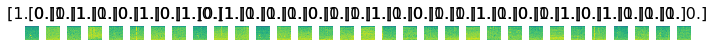

In [0]:

# plot function, used to plot images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

imgs, labels = next(train_batches)

# we plot these samples of images and their labels 1 batch at a time.
plots(imgs, titles=labels)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


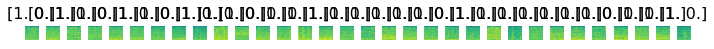

In [0]:

imgs, labels = next(train_batches)

# we plot these samples of images and their labels 1 batch at a time.
plots(imgs, titles=labels)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


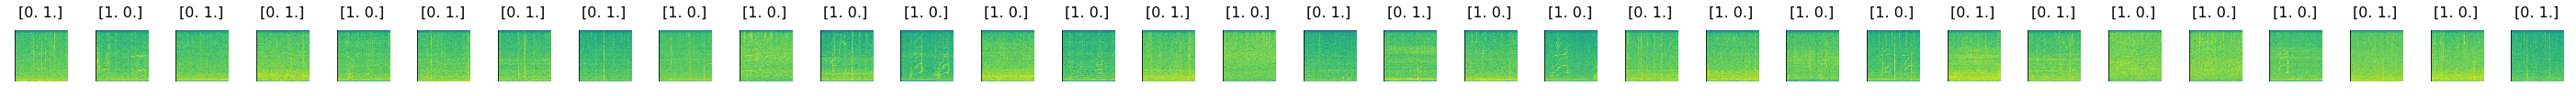

In [0]:
# we plot these samples of images and their labels 1 batch at a time.
plots(imgs, titles=labels)

In [0]:
predictions=model.predict_generator(test_batches,steps=225,verbose=0)

In [0]:
predictions[0:10]

array([[0.24335767, 0.7566424 ],
       [0.2983613 , 0.70163864],
       [0.370002  , 0.629998  ],
       [0.6755965 , 0.32440352],
       [0.90770596, 0.09229406],
       [0.31044376, 0.68955624],
       [0.34705758, 0.6529424 ],
       [0.34993353, 0.65006644],
       [0.85084295, 0.14915703],
       [0.05222579, 0.9477742 ]], dtype=float32)

In [0]:
!pip install sklearn

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [0]:
def plot_confusion_matrix()

#Please stop  here as below there are just some scrapped codes and experiments

In [0]:
negatives_train2.to_csv('negative2.tsv', mode='a', sep='\t',header=False)
negatives_train3.to_csv('negative3.tsv', mode='a', sep='\t',header=False)

In [0]:
negatives_test.to_csv('negative_test.tsv', mode='a', sep='\t',header=False)

In [0]:
negatives_test.head()

start        end  label
filename                        sel_id                            
OS_9_27_2017_08_14_00__0001.wav 0       4.613416   7.613416      0
                                1       4.945017   7.945017      0
                                2       5.011769   8.011769      0
                                3       7.077830  10.077830      0
                                4       7.463605  10.463605      0

In [0]:
!mkdir Orcacalls

In [0]:
#!mkdir train
#!cd /content/Round2_OS_07_05/wav/train
!mkdir orcacallspngs

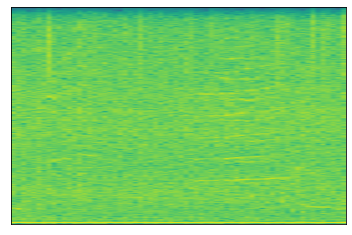

In [0]:
basePath = r"/content/Round2_OS_07_05/wav/"
plotPath = join(basePath,"Orcacalls")
folderpath = join(basePath, "pod_calls")
#onlyfiles = [f for f in listdir(folderpath) if isfile(join(join(folderpath, f)))]

data, samplerate = sf.read("/content/Round2_OS_07_05/wav/Orcacalls/pod_calls/calls100.wav")

f, t, spec = signal.spectrogram(data, samplerate)

filename = file.split(sep=".")[0]
#filenumber = filename.split(sep="-")[1]
    
fig, ax = plt.subplots(1, 1)

ax.specgram(data, Fs=samplerate, NFFT=1024)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Rescale y axis labels from Hz to KHz
scale_y = 1000
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
#ax.yaxis.set_major_formatter(ticks_y)
    
#ax.set_xlabel("Time (s)")
#ax.set_ylabel("Frequency (kHz)")
#ax.set_title("Call " + filenumber)
#print(plt.shape)    
plt.savefig(join(plotPath, 
                 filename + ".png"))

In [0]:
import cv2

In [0]:
img = cv2.imread('/content/Round2_OS_07_05/wav/Orcacalls/calls309.png') 

In [0]:
img.shape

(288, 432, 3)

In [0]:
img2=cv2.imread("/content/Round2_OS_07_05/wav/Orcacalls/calls305.png")
img2.shape

(288, 432, 3)

In [0]:
img3=cv2.imread("/content/Round2_OS_07_05/wav/Orcacalls/calls91.png")
img3.shape

(288, 432, 3)

In [0]:
%cd /content/

/content


In [0]:
!pwd

/content


In [0]:
%cd /content/Round2_OS_07_05/wav

/content/Round2_OS_07_05/wav


In [0]:
negatives_train2=pd.read_csv("/content/negative2.tsv", sep='\t')

In [0]:
negatives_train2.head()

,1562337136_0004.wav,0,1.7710520284269908,4.771052028426991,0.1
0,1562337136_0004.wav,1,4.862640,7.862640,0
1,1562337136_0004.wav,2,5.159236,8.159236,0
2,1562337136_0004.wav,3,11.424016,14.424016,0
3,1562337136_0004.wav,4,31.195520,34.195520,0
4,1562337136_0005.wav,0,9.157749,12.157749,0


In [0]:

file_name=negatives_train2.iloc[:,0].values
start_time=negatives_train2.iloc[:,2].values
#=annot_id2.iloc[:,0].values
print(start_time[0])
#print(a)
print((file_name))

4.862640151090389
['1562337136_0004.wav' '1562337136_0004.wav' '1562337136_0004.wav'
 '1562337136_0004.wav' '1562337136_0005.wav' '1562337136_0005.wav'
 '1562337136_0005.wav' '1562337136_0005.wav' '1562337136_0005.wav'
 '1562337136_0005.wav' '1562337136_0005.wav' '1562337136_0005.wav'
 '1562337136_0006.wav' '1562337136_0006.wav' '1562337136_0006.wav'
 '1562337136_0006.wav' '1562337136_000a.wav' '1562337136_000a.wav'
 '1562337136_000a.wav' '1562337136_000a.wav' '1562337136_000a.wav'
 '1562337136_000a.wav' '1562337136_000a.wav' '1562337136_000a.wav'
 '1562337136_000a.wav' '1562337136_000b.wav' '1562337136_000b.wav'
 '1562337136_000b.wav' '1562337136_000b.wav' '1562337136_000b.wav'
 '1562337136_000c.wav' '1562337136_000c.wav' '1562337136_000c.wav'
 '1562337136_000d.wav' '1562337136_000d.wav' '1562337136_000d.wav'
 '1562337136_000d.wav' '1562337136_000d.wav' '1562337136_000d.wav'
 '1562337136_000d.wav' '1562337136_000d.wav' '1562337136_000d.wav'
 '1562337136_000d.wav' '1562337136_000e.wav'

In [0]:
!pwd
%cd /content/Round2_OS_07_05/wav

/content
/content/Round2_OS_07_05/wav


In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+3000
  call=sound[p:o]
  #i=i+1
  call.export("/content/Round2_OS_07_05/wav/Orcacalls/negative/calls_neg{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

4862.640151090389
5159.236102558657
11424.016043734608
31195.52026191245
9157.749156895277
11919.859891019227
14207.161289211428
15249.205971603998
25906.300196015374
35196.723414121174
48903.706052736175
52698.757701969655
17670.40817203903
39969.50616710592
44332.357764387634
48771.95883660914
1888.2985027530024
2090.0414680989743
6486.329110452345
9548.64166826394
39752.12789710136
44740.11755412434
45910.6085992581
48127.7271990036
55386.739669110575
6820.325731453466
14785.357596603348
15364.613019752966
19556.07635967189
21330.009243849898
18025.561540395243
19518.953225638827
50612.26689807597
997.8460785926586
1716.1181085505746
2442.5143654171397
3526.6142296764533
12976.50194209808
28720.31639456009
33315.104080362056
34637.500227116856
37561.55999796636
51602.41555513261
1806.5722014783887
14576.204300446308
20669.546220628206
31254.897402726212
38005.934462154706
56658.21675990173
28915.74120576973
29583.082780901066
30234.07809354069
39625.67112956526
40126.411642493855
42

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'

In [0]:
basePath = r"/content/Round2_OS_07_05/wav/"
plotPath = join(basePath,"train/nocalls")
folderpath = join(basePath, "Orcacalls/negative")
onlyfiles = [f for f in listdir(folderpath) if isfile(join(join(folderpath, f)))]

for idx, file in enumerate(onlyfiles):
    data, samplerate = sf.read(join(folderpath, file))
    f, t, spec = signal.spectrogram(data, samplerate)
    filename = file.split(sep=".")[0]
    #filenumber = filename.split(sep="-")[1]
    
    fig, ax = plt.subplots(1, 1)
    ax.specgram(data, Fs=samplerate, NFFT=1024)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Rescale y axis labels from Hz to KHz
    scale_y = 1000
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    #ax.yaxis.set_major_formatter(ticks_y)
    
    #ax.set_xlabel("Time (s)")
    #ax.set_ylabel("Frequency (kHz)")
    #ax.set_title("Call " + filenumber)
    #print(plt.shape)    
    plt.savefig(join(plotPath, 
                 filename + ".png"))

In [0]:
k=cv2.imread('/content/Round2_OS_07_05/wav/train/nocalls/calls_neg10.png')

In [0]:
k.shape


(288, 432, 3)

In [0]:

file_name=annot_id3.iloc[:,0].values
start_time=annot_id3.iloc[:,2].values
#=annot_id2.iloc[:,0].values
print(start_time[2])
#print(a)
print((file_name[2]))

6.1104513064133
OS_9_27_2017_08_14_00__0002.wav


In [0]:
std_annot_train3.head()

,,start,label,end
filename,annot_id,,,
OS_9_27_2017_08_03_00__0002.wav,0,0.000000,1,0.000000
OS_9_27_2017_08_03_00__0003.wav,0,0.000000,1,0.000000
OS_9_27_2017_08_09_00__0000.wav,0,0.000000,1,0.000000
OS_9_27_2017_08_14_00__0002.wav,0,6.110451,1,7.856295
OS_9_27_2017_08_14_00__0003.wav,0,0.000000,1,0.000000


In [0]:
annot3_ne=pd.read_csv("/content/podcast3.tsv", sep='\t')

In [0]:
annot3_ne

,wav_filename,start,duration_s,location,date,data_source,data_source_id,label
0,OS_9_27_2017_08_14_00__0002.wav,6.110451,1.745843,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
1,OS_9_27_2017_08_14_00__0004.wav,12.717882,2.450000,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
2,OS_9_27_2017_08_14_00__0004.wav,29.825347,1.811979,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
3,OS_9_27_2017_08_14_00__0004.wav,43.504514,1.599306,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
4,OS_9_27_2017_08_14_00__0004.wav,48.404514,1.939583,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_08_14,SRKWs
...,...,...,...,...,...,...,...,...
470,OS_9_27_2017_11_53_00__0002.wav,0.000000,0.000000,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_11_53,SRKWs
471,OS_9_27_2017_11_53_00__0003.wav,0.000000,0.000000,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_11_53,SRKWs
472,OS_9_27_2017_11_58_00__0000.wav,0.000000,0.000000,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_11_58,SRKWs
473,OS_9_27_2017_11_58_00__0002.wav,0.000000,0.000000,orcasound_lab,2017-09-27,Orcasound_PodCast_Round3,OS_9_27_2017_11_58,SRKWs


In [0]:

file_name=annot3_ne.iloc[:,0].values
start_time=annot3_ne.iloc[:,1].values
#=annot_id2.iloc[:,0].values
print(start_time[2])
#print(a)
print((file_name[2]))

29.8253472222222
OS_9_27_2017_08_14_00__0004.wav


In [0]:
%cd /content/Round3_OS_09_27_2017/wav

/content/Round3_OS_09_27_2017/wav


In [0]:
!pwd

/content/Round3_OS_09_27_2017/wav


In [0]:
from pydub import AudioSegment
i=0
o=0
for x in file_name:
  
  AUDIO_FILE=x
  sound = AudioSegment.from_file(AUDIO_FILE)
  p=start_time[i]
  p=p*1000
  print(p)
  i=i+1
  o=p+3000
  call=sound[p:o]
  #i=i+1
  call.export("/content/Round2_OS_07_05/wav/Orcacalls3/positive/calls_positive3{0}.wav".format(i),format="wav")
'''
  k=0
  p=0
m=len(sound)
halfway_point = 61000
for i in range(i,m,61000):

        first_half = sound[p:halfway_point]
     #   sh=sound[p+12000:halfway_point+62000]


        k=k+61000
        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")
    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")
        halfway_point=halfway_point+61000
        p=p+61000

'''

6110.451306413301
12717.881944444402
29825.347222222197
43504.5138888889
48404.5138888889
3530.3819444444403
18842.8819444444
21692.7083333333
38281.25
45980.034722222204
54104.1666666667
9311.163895486938
19058.7885985748
22259.501187648504
32977.0387965162
30880.2083333333
11994.791666666699
36111.9791666667
37898.4375
45894.965277777796
49042.534722222204
11532.2265625
16365.234375
20145.5078125
39094.7265625
5790.0390625
8326.171875
2631.8359375
24500.0
38519.444444444394
53729.8611111111
56605.208333333394
5869.79166666667
2807.2916666666697
0.0
33087.6088677751
36750.0
50115.3998416469
23132.4228028504
25557.2050673001
29776.326207442606
40833.3333333333
45440.41963578779
47671.2193190816
0.0
19600.0
26093.3566433566
30351.8259518259
37368.6868686869
44195.1825951826
6139.27738927739
12135.7808857809
47591.297591297596
50351.592851592904
53545.8984375
57134.765625
59240.234375
17728.740157480304
20564.5669291339
24500.0
26950.0
50061.0236220473
56784.05511811029
59468.52494475739

'\n  k=0\n  p=0\nm=len(sound)\nhalfway_point = 61000\nfor i in range(i,m,61000):\n\n        first_half = sound[p:halfway_point]\n     #   sh=sound[p+12000:halfway_point+62000]\n\n\n        k=k+61000\n        first_half.export("/content/long_sample{0}.wav".format(k),format="wav")\n    #    sh.export("/content/Pests-data/popo{0}.wav".format(k),format="wav")\n        halfway_point=halfway_point+61000\n        p=p+61000\n\n'